# Interpolate

## Interpolate 1d

In [1]:
from smpl import plot
from smpl import stat
from smpl import data
from smpl import interpolate
import numpy as np

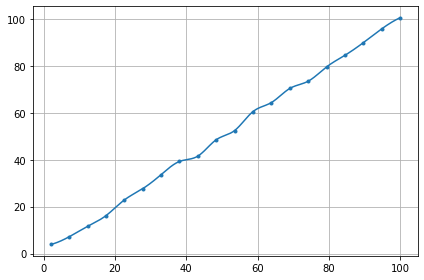

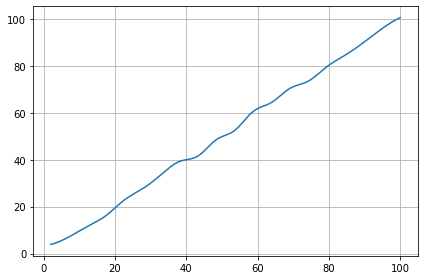

In [2]:
x = np.linspace(2,100,20)
y = stat.noisy(x)
plot.data(x,y,interpolate=True)
plot.show()
plot.data(x,y,interpolate=True,also_data=False)
plot.show()

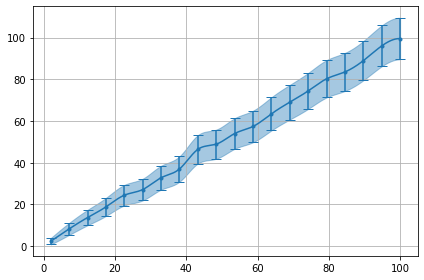

''

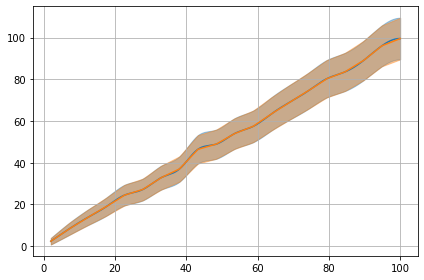

In [3]:
x = np.linspace(2,100,20)
y = stat.poisson_dist(stat.noisy(x))
plot.data(x,y,interpolate=True,sigmas=1,show=True)
plot.data(x,y,interpolate=True,sigmas=1,also_data=False)
plot.data(x,y,interpolate=True,sigmas=1,also_data=False,init=False,interpolator='linear')
""

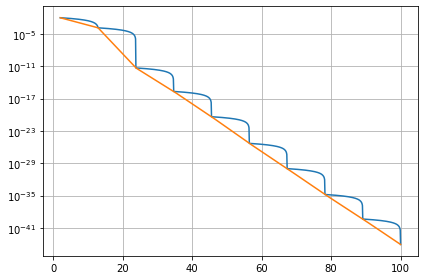

[1.00157881e-02 1.35123821e-04 4.90867248e-12 2.14217544e-16
 4.40996945e-21 5.03506842e-26 1.04820434e-30 1.67146954e-35
 4.70019882e-40 9.05020792e-45]
[1.00157881e-02 1.35123821e-04 4.90867248e-12 2.14217544e-16
 4.40996945e-21 5.03506842e-26 1.04820434e-30 1.67146954e-35
 4.70019882e-40 9.05020792e-45]


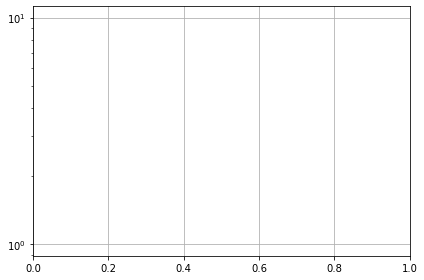

In [26]:
x = np.linspace(2,100,10)
y = np.exp(-stat.noisy(x,std=2))
plot.data(x,y,interpolate=True,also_data=False,interpolator='linear',logy=True)
plot.data(x,y,interpolate=True,also_data=False,interpolator='exp',logy=True,init=False)
plot.show()

from smpl import interpolate as interp
from uncertainties import unumpy as unp
f1 = interp.interpolate(x,y,interpolator="exp")
f2 = lambda x : np.exp(interp.interpolate(x,unp.log(y),interpolator="linear")(x))
plot.data(x,f2(x),also_data=False,logy=True,init=False)
print(y)
print(f2(x))

[1.79576101e+00 2.63604532e-06 1.78572829e-12 6.24353828e-16
 1.07264653e-20 1.15421236e-25 2.10030093e-30 1.27691351e-33
 1.03658272e-39 2.99262940e-44]


(<numpy.vectorize at 0x7f5527dfddc0>,
 array([  2.        ,   2.0980981 ,   2.1961962 ,   2.29429429,
          2.39239239,   2.49049049,   2.58858859,   2.68668669,
          2.78478478,   2.88288288,   2.98098098,   3.07907908,
          3.17717718,   3.27527528,   3.37337337,   3.47147147,
          3.56956957,   3.66766767,   3.76576577,   3.86386386,
          3.96196196,   4.06006006,   4.15815816,   4.25625626,
          4.35435435,   4.45245245,   4.55055055,   4.64864865,
          4.74674675,   4.84484484,   4.94294294,   5.04104104,
          5.13913914,   5.23723724,   5.33533534,   5.43343343,
          5.53153153,   5.62962963,   5.72772773,   5.82582583,
          5.92392392,   6.02202202,   6.12012012,   6.21821822,
          6.31631632,   6.41441441,   6.51251251,   6.61061061,
          6.70870871,   6.80680681,   6.9049049 ,   7.003003  ,
          7.1011011 ,   7.1991992 ,   7.2972973 ,   7.3953954 ,
          7.49349349,   7.59159159,   7.68968969,   7.78778779,
  

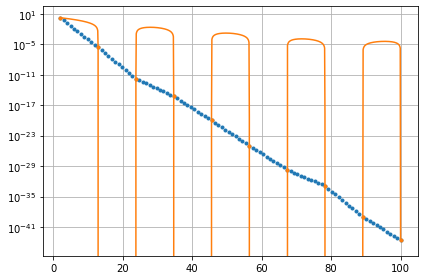

In [42]:
from scipy import interpolate
x = np.linspace(2,100,10)
y = np.exp(-stat.noisy(x,std=2))
f = lambda x_new : np.exp(interpolate.interp1d(x,np.log(y),kind="linear")(x_new))
print(y)
x2 = np.linspace(2,100,100)
#interpolate.interp1d(x,y,kind="exponential")
plot.data(x2,f(x2),logy=True)
plot.data(x,y,interpolate=True,init=False,logy=True,kind="exp")

## Interpolate 2d

[  0. -25.   0.  75. 200. -25. -50. -25.  50. 175.   0. -25.   0.  75.
 200.  75.  50.  75. 150. 275. 200. 175. 200. 275. 400.]
[-1.45100421e-14  2.00000000e+02 -2.50000000e+01  7.50000000e+01
  2.64395939e-15 -2.50000000e+01  1.75000000e+02 -5.00000000e+01
  5.00000000e+01 -2.50000000e+01  2.00000000e+02  7.50000000e+01
 -2.12052598e-14 -2.50000000e+01  2.84217094e-14  7.50000000e+01
  5.00000000e+01  1.50000000e+02  7.50000000e+01  2.75000000e+02
  2.00000000e+02  1.75000000e+02  2.75000000e+02  2.00000000e+02
  4.00000000e+02]


/home/apn/.local/lib/python3.8/site-packages/smpl/interpolate/interpolate.py:60: UserWarning: Bad interpolation. Increase Order.
  warnings.warn("Bad interpolation. Increase Order.")


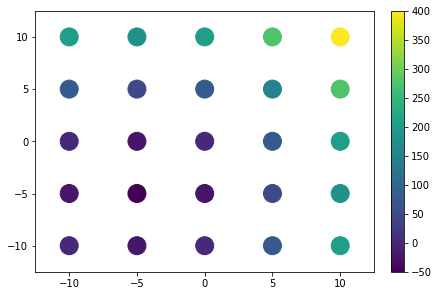

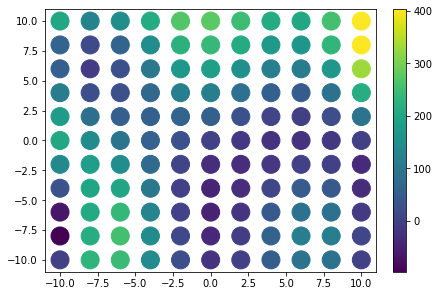

In [5]:
xvalues = np.linspace(-10,10,5)
yvalues = np.linspace(-10,10,5)
xx, yy = data.flatmesh(xvalues, yvalues)
zz=xx**2+yy**2+10*xx+10*yy
print(zz)
plot.plot2d(xx,yy,zz,fill_missing=False,style='scatter',logz=False)
f=interpolate.interpolate(xx,yy,zz)
print(f(xx,yy))
xvalues = np.linspace(-10,10,11)
yvalues = np.linspace(-10,10,11)
xx, yy = data.flatmesh(xvalues, yvalues)
plot.plot2d(xx,yy,f(xx,yy),fill_missing=False,style='scatter',logz=False)

/usr/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: A theoretically impossible result when finding a smoothing spline
with fp = s. Probable causes: s too small or badly chosen eps.
(abs(fp-s)/s>0.001)
	kx,ky=3,3 nx,ny=9,8 m=20 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/usr/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=6,8 m=20 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/usr/lib/python3.8/site-packages/scipy/interpolate/_fitpack2.py:1176: UserWarning: 
The required storage space exceeds the available storage space: nxest
or nyest too small, or s too small.
The weighted least-squares spline corresponds to the current set of
knots.
  warnings.warn(message)


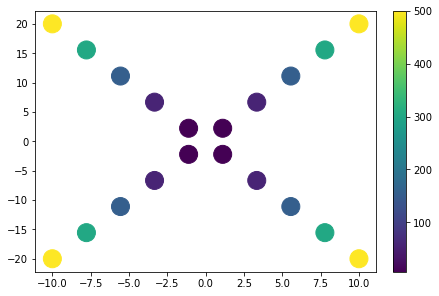

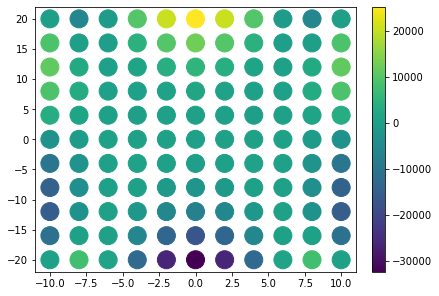

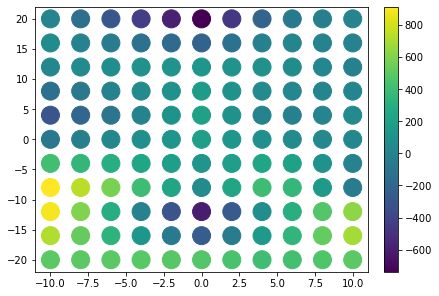

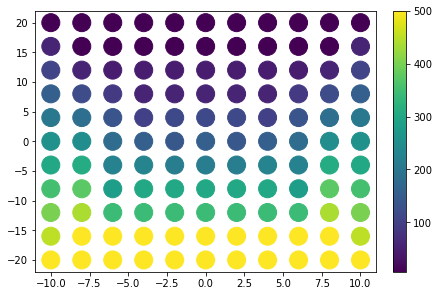

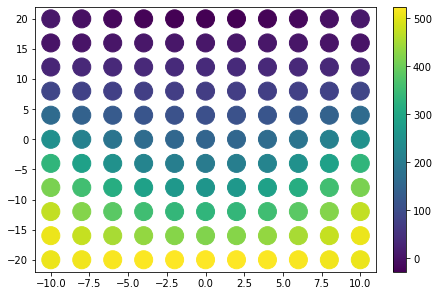

In [6]:
xvalues = np.linspace(-10,10,10)
yvalues = xvalues*2
xx = xvalues
yy = yvalues
xx = np.append(xx,xx)
yy = np.append(yy,-yy)
zz = xx**2+yy**2
f_cub=interpolate.interpolate(xx,yy,zz)
f_lin=interpolate.interpolate(xx,yy,zz,interpolator='linear')
f_lind=interpolate.interpolate(xx,yy,zz,interpolator='linearnd')
f_bi=interpolate.interpolate(xx,yy,zz,interpolator='bivariatespline')
plot.plot2d(xx,yy,xx**2+yy**2,style='scatter',fill_missing=True,logz=False)

xvalues = np.linspace(-10,10,11)
yvalues = np.linspace(-20,20,11)
xx, yy = data.flatmesh(xvalues, yvalues)
plot.plot2d(xx,yy,f_cub(xx,yy),fill_missing=False,style='scatter',logz=False)
plot.plot2d(xx,yy,f_lin(xx,yy),fill_missing=False,style='scatter',logz=False)
plot.plot2d(xx,yy,f_lind(xx,yy),fill_missing=False,style='scatter',logz=False)
plot.plot2d(xx,yy,f_bi(xx,yy),fill_missing=False,style='scatter',logz=False)